In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
data = pd.concat(pd.read_pickle(g) for g in [
    "../salomon/results/elementary.zip",
    "../salomon/results/irw.zip",
    "../salomon/results/pegasus.zip",
    "../salomon/results/rg.zip"
])
data["graph_set"] = data["graph_set"].apply(lambda i: os.path.basename(i))
data = data.drop(columns="execution_time")

In [28]:
grouped = data[(data["imode"] == "exact") &
                (data["min_sched_interval"] == 0.1) &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "min_sched_interval", "sched_time", "netmodel"])
netmodels = grouped["time"].mean().unstack().dropna().reset_index()
netmodels["ratio"] = netmodels["minmax"] / netmodels["simple"]

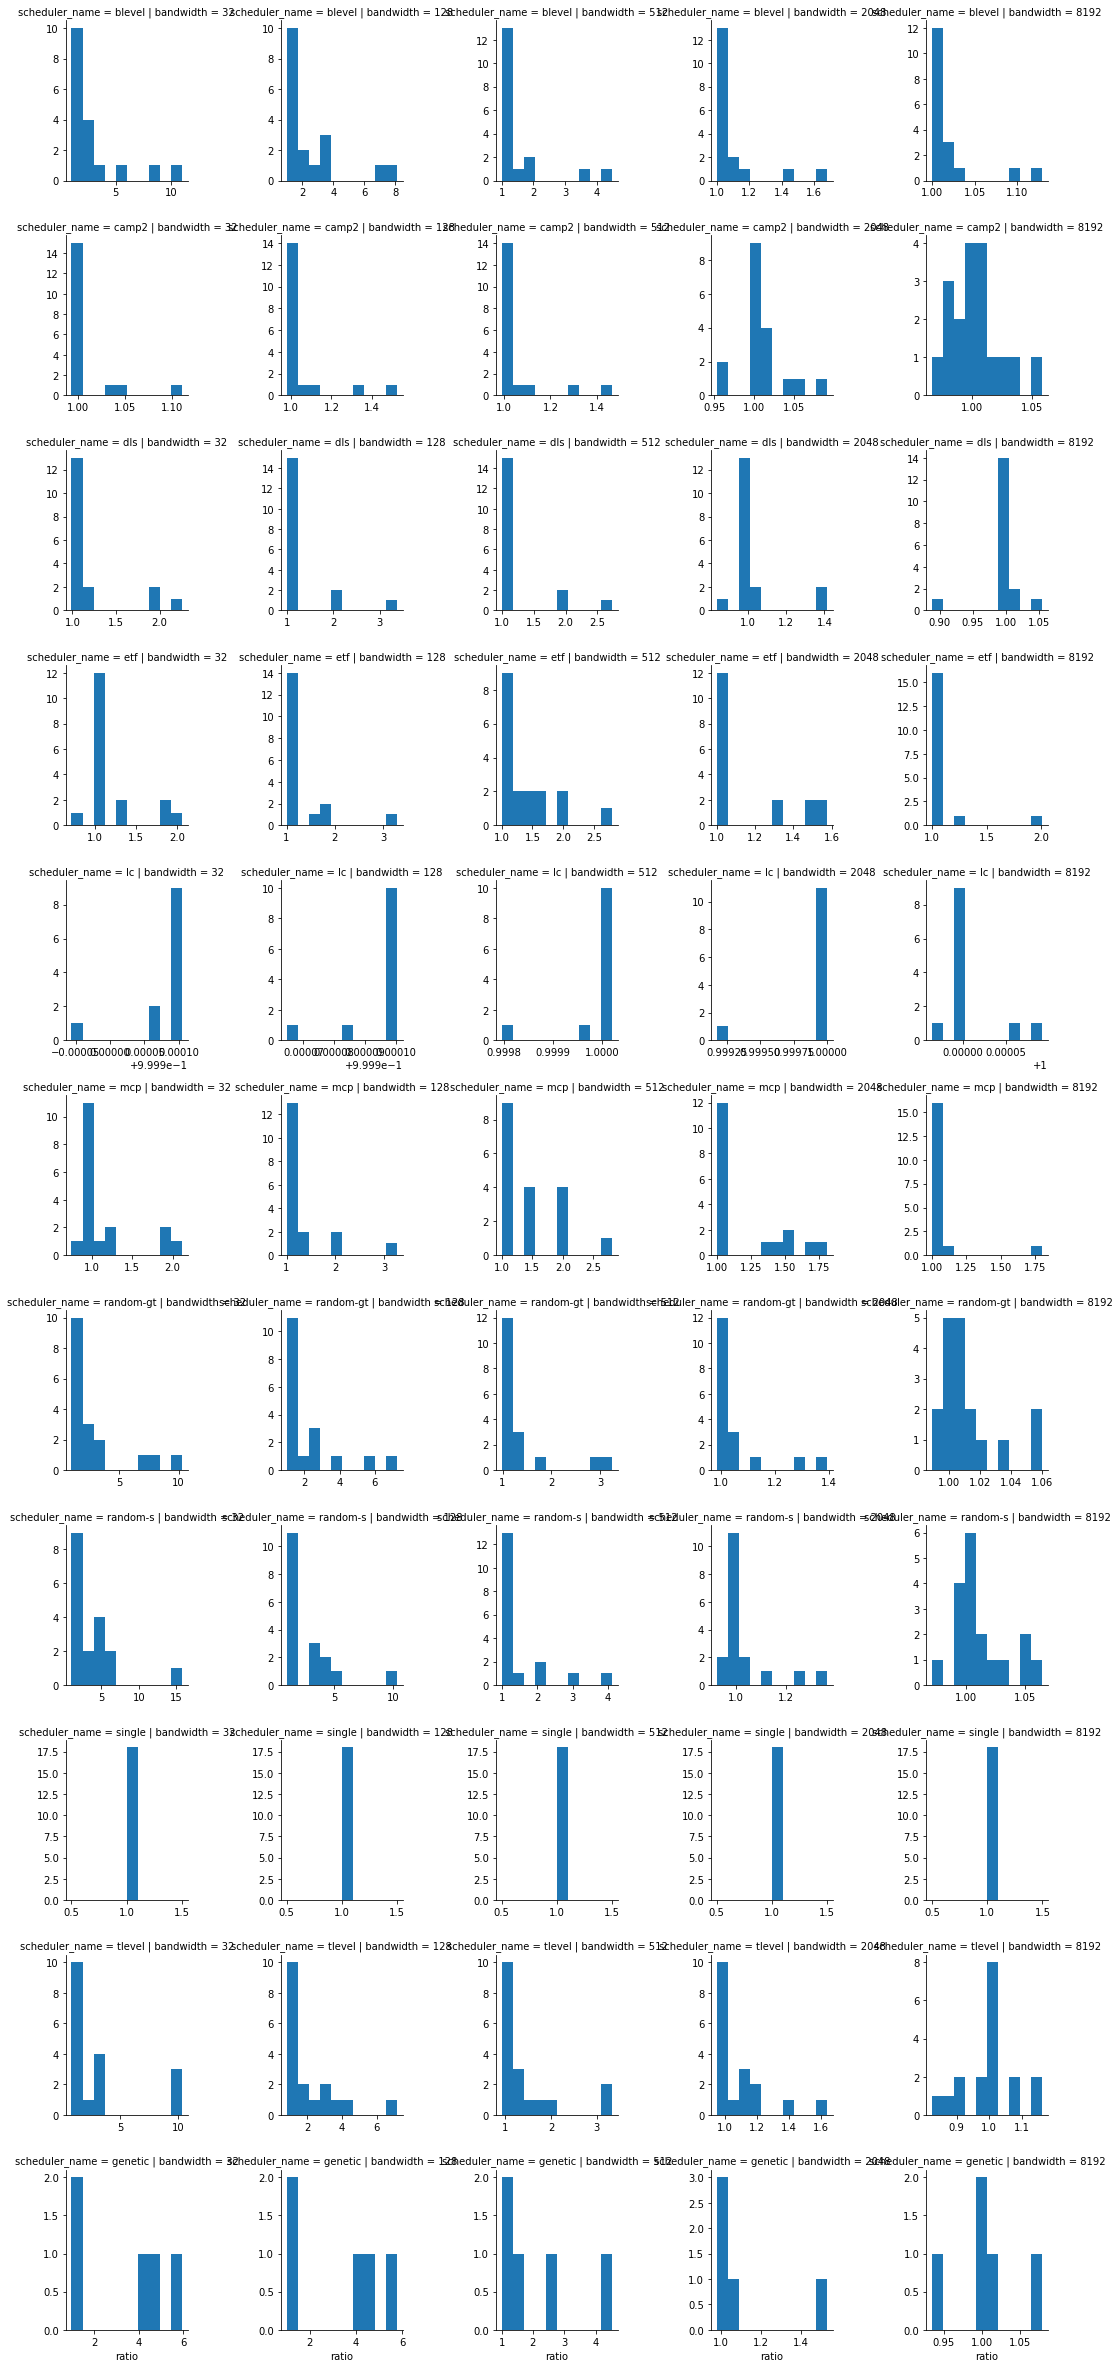

In [31]:
irw = netmodels[netmodels["graph_set"]=="irw"]
g = sns.FacetGrid(irw, col="bandwidth", row="scheduler_name", sharey=False, sharex=False)
g.map(plt.hist, "ratio");

In [41]:
grouped = data[(data["imode"] == "exact") &
                (data["netmodel"] == "minmax") &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "netmodel", "min_sched_interval"])
timings = grouped["time"].mean().unstack().dropna().reset_index()

normalizer = timings[0.1].copy()
keys = (0.0, 0.1, 0.4, 1.6, 6.4)
for x in keys:
    timings[x] /= normalizer
timings = timings.melt(id_vars=["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "imode", "netmodel"], value_vars=keys, value_name="interval_ratio")
timings

,graph_set,graph_id,graph_name,cluster_name,bandwidth,scheduler_name,imode,netmodel,min_sched_interval,interval_ratio
0,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,blevel,exact,minmax,0,1.008008
1,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,dls,exact,minmax,0,1.000000
2,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,etf,exact,minmax,0,1.000000
3,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,mcp,exact,minmax,0,1.000000
4,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-gt,exact,minmax,0,0.999071
5,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-s,exact,minmax,0,1.054213
6,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,single,exact,minmax,0,1.000000
7,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,tlevel,exact,minmax,0,1.018013
8,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,128,blevel,exact,minmax,0,0.956670
9,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,128,dls,exact,minmax,0,1.000000


In [43]:
irw = timings[timings["graph_set"] == "irw"]
irw

g = sns.FacetGrid(irw, col="bandwidth", row="scheduler_name", sharey=False, sharex=False)
def draw(**kw):
    data = kw["data"]
    data["min_sched_interval"] = data["min_sched_interval"].astype(str)
    ax = sns.scatterplot(data=data, x="min_sched_interval", y="interval_ratio", hue="graph_name")
    #ax.set(yscale="log")
g.map_dataframe(draw).add_legend()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [5]:
grouped = data[(data["min_sched_interval"] == 0.1) &
                (data["netmodel"] == "minmax") &
                (data["cluster_name"].isin(["4x4", "16x4", "stairs16"]))]
grouped = grouped.groupby(["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "min_sched_interval", "netmodel", "imode"])
imodes = grouped["time"].mean().unstack().reset_index()

normalizer = imodes["exact"].copy()
keys = ("exact", "mean", "user")
for x in keys:
    imodes[x] /= normalizer
imodes = imodes.melt(id_vars=["graph_set", "graph_id", "graph_name", "cluster_name", "bandwidth", "scheduler_name", "min_sched_interval", "netmodel"], value_vars=keys, value_name="exact_ratio")
imodes

,graph_set,graph_id,graph_name,cluster_name,bandwidth,scheduler_name,min_sched_interval,netmodel,imode,exact_ratio
0,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,blevel,0.1,minmax,exact,1.000000
1,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,camp2,0.1,minmax,exact,1.000000
2,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,dls,0.1,minmax,exact,1.000000
3,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,etf,0.1,minmax,exact,1.000000
4,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,genetic,0.1,minmax,exact,1.000000
5,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,lc,0.1,minmax,exact,1.000000
6,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,mcp,0.1,minmax,exact,1.000000
7,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-gt,0.1,minmax,exact,1.000000
8,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,random-s,0.1,minmax,exact,1.000000
9,elementary,128410f5-6701-4e15-94de-4545aab6e6a3,plain1cpus,16x4,32,single,0.1,minmax,exact,1.000000


/home/ber0134/.virtualenvs/schedtools/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


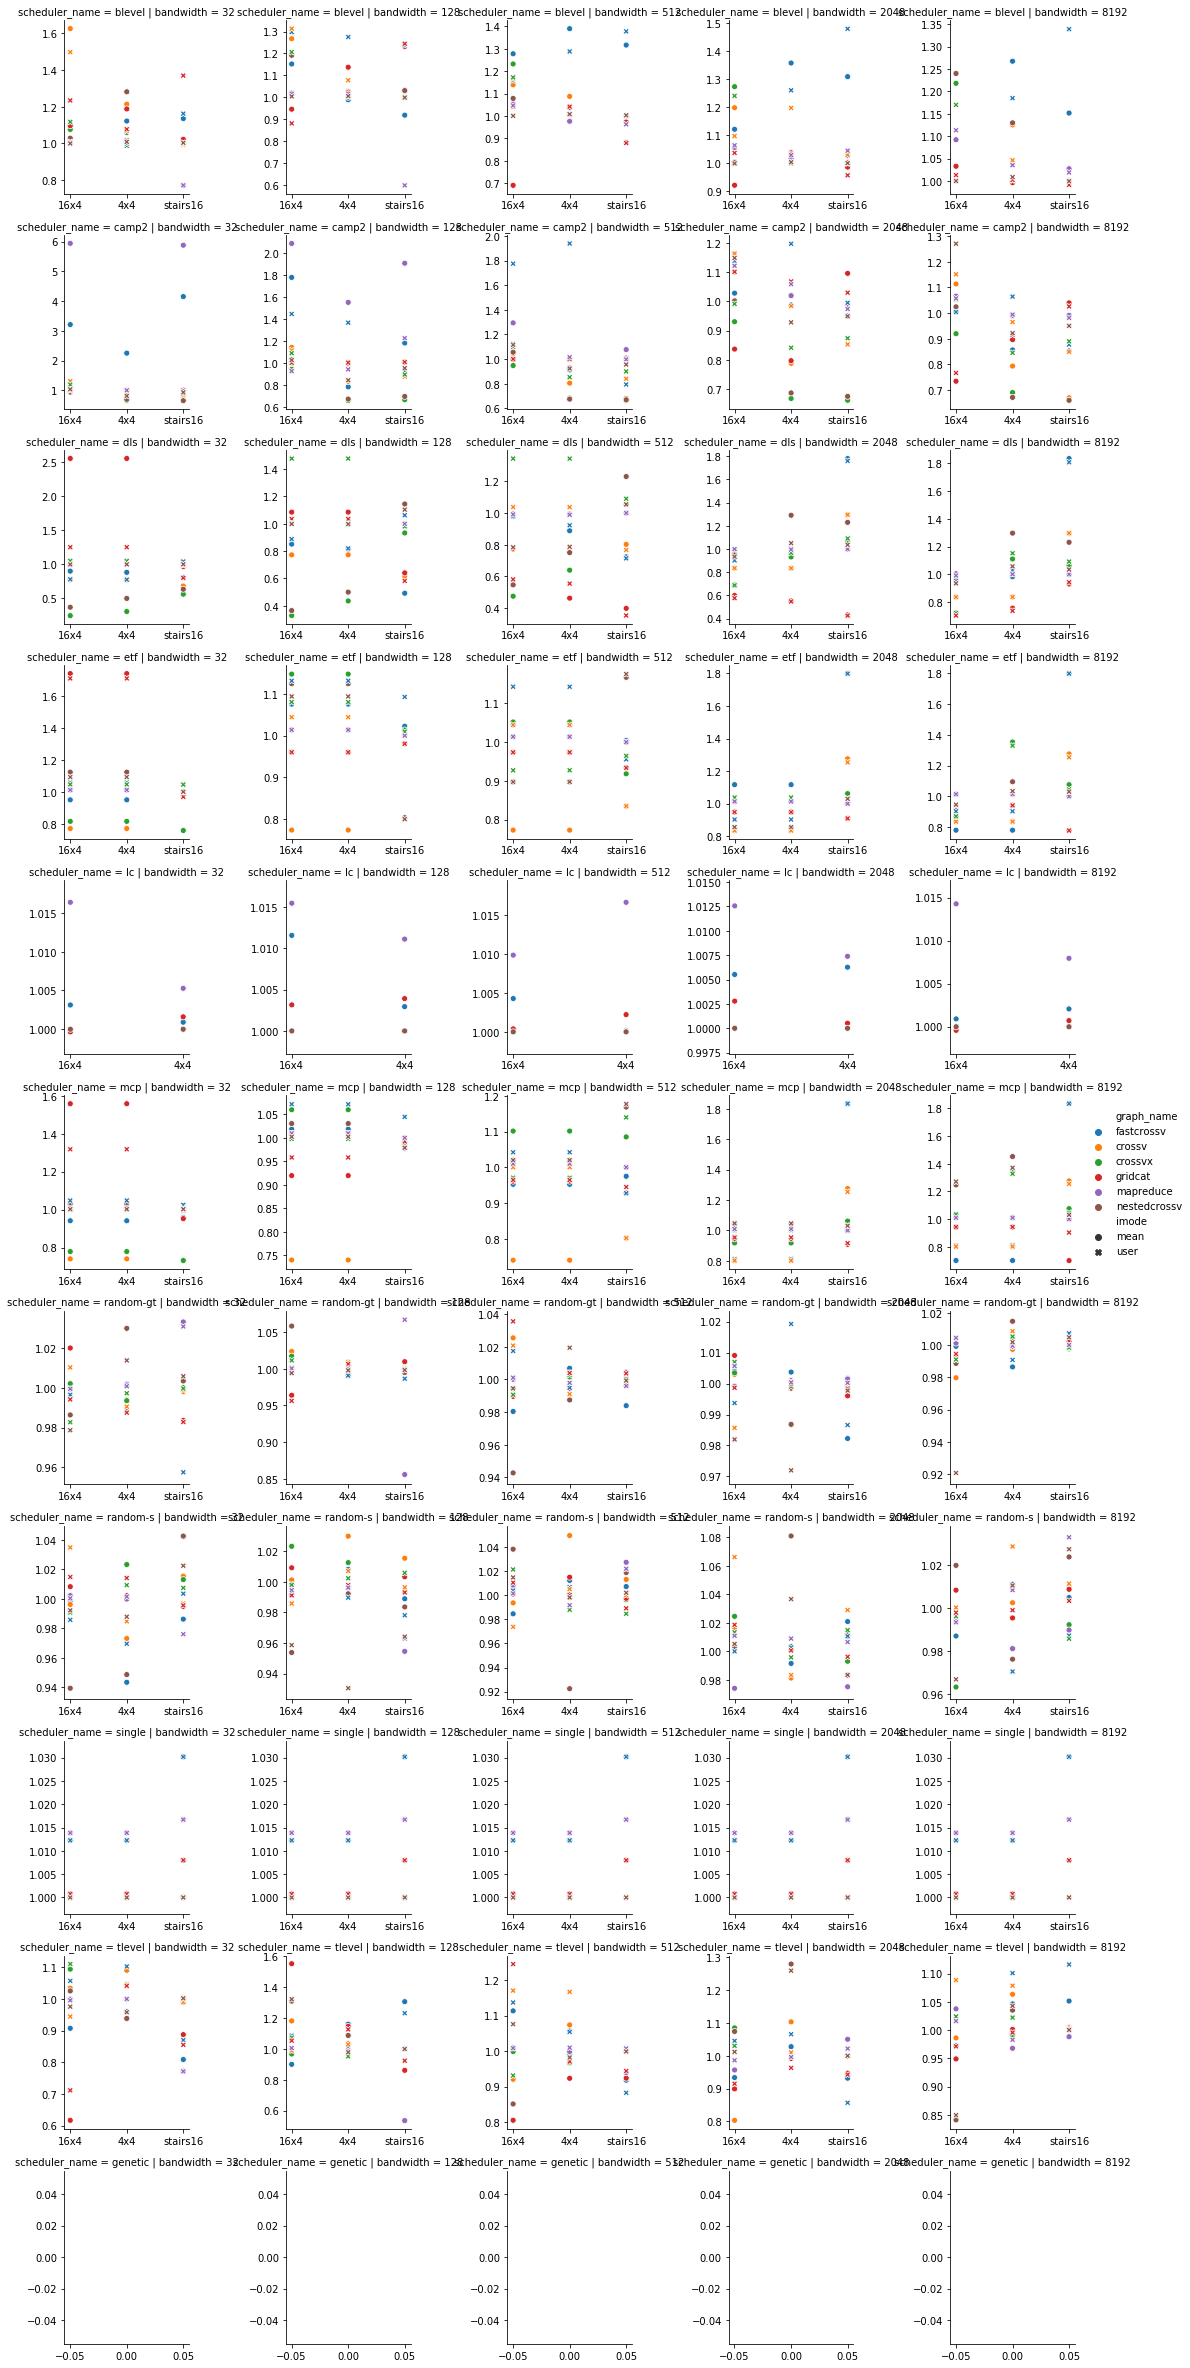

In [20]:
irw = imodes[(imodes["graph_set"] == "irw") & (imodes["imode"] != "exact")]
g = sns.FacetGrid(irw, col="bandwidth", row="scheduler_name", sharey=False, sharex=False)
def draw(**kw):
    data = kw["data"]
    data["bandwidth"] = data["bandwidth"].astype(str)
    ax = sns.scatterplot(data=data, x="cluster_name", y="exact_ratio", style="imode", hue="graph_name")
    #ax.set(yscale="log")
g.map_dataframe(draw).add_legend()